# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

Введём матрицу $A=(\mathbf{1}, \mathbf{x}, \mathbf{x}^2, ... , \mathbf{x}^m)$, где $\mathbf{x}$ - вектор из данных по оси $x$. Тогда для нахождения коэффициентов $a_0, a_1 ... a_m$, которые наилучшим образом аппроксимируют данные, нужно решить систему $A^T A \mathbf{a} = A^T \mathbf{y}$, где $\mathbf{a}$ - вектор из этих коэффициентов, а $\mathbf{y}$ - вектор с данными по оси $y$

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def approximation(x0, y0, m):
    x = np.array(x0)
    y = np.array(y0)
    A = np.zeros((len(x0), m + 1))
    for i in range(m + 1):
        A[:, i] = x**i
    a = np.linalg.solve(A.T @ A, A.T @ y)
    return lambda x: sum(a[i] * x**i for i in range(m + 1))

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

Оптимальное m = 4


<IPython.core.display.Javascript object>


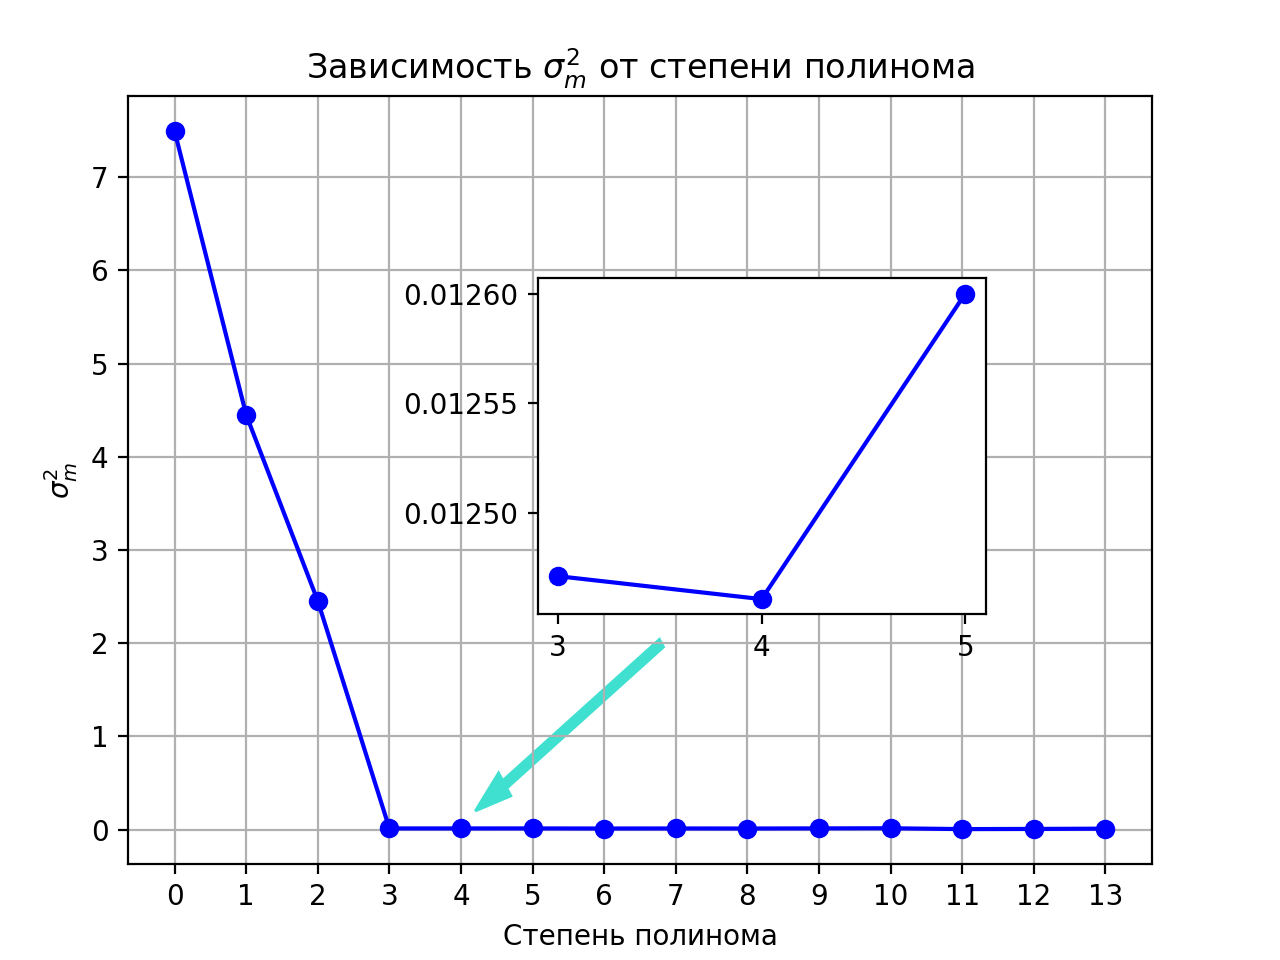

In [4]:
n = len(x)
sigma = np.array([])
for i in range(14):
    f = approximation(x, y, i)
    sigma = np.append(sigma, (sum((f(x[j]) - y[j])**2 for j in range(n)) / (n - i)))
    
m = 0
for i in range(13):
    if sigma[i + 1] > sigma[i]:
        m = i
        break

print('Оптимальное m = {}'.format(m))

fig = plt.figure('График 1')

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1.plot(sigma, 'o-', color='b')
axes1.arrow(6.8, 2, -2.6, -1.8, 
            length_includes_head = True, 
            width = 0.1, 
            head_length = 0.5, 
            color='turquoise')
axes1.set_xlabel('Степень полинома')
axes1.set_ylabel('$\sigma_m^2$')
axes1.set_title('Зависимость $\sigma_m^2$ от степени полинома')
axes1.set_xticks(np.arange(14))
axes1.grid()

axes2 = fig.add_axes([0.42, 0.36, 0.35, 0.35])
axes2.plot(np.arange(3, 6), sigma[3:6], 'bo-')
axes2.set_xticks([3, 4, 5])

Из графика видно, что $\sigma_m^2$ перестаёт сильно меняться при $m=3$ и начинает увеличиваться после $m=4$. То есть приходим к выводу, что многочлен четвертой степени лучше всего описывает данные точки

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

<IPython.core.display.Javascript object>


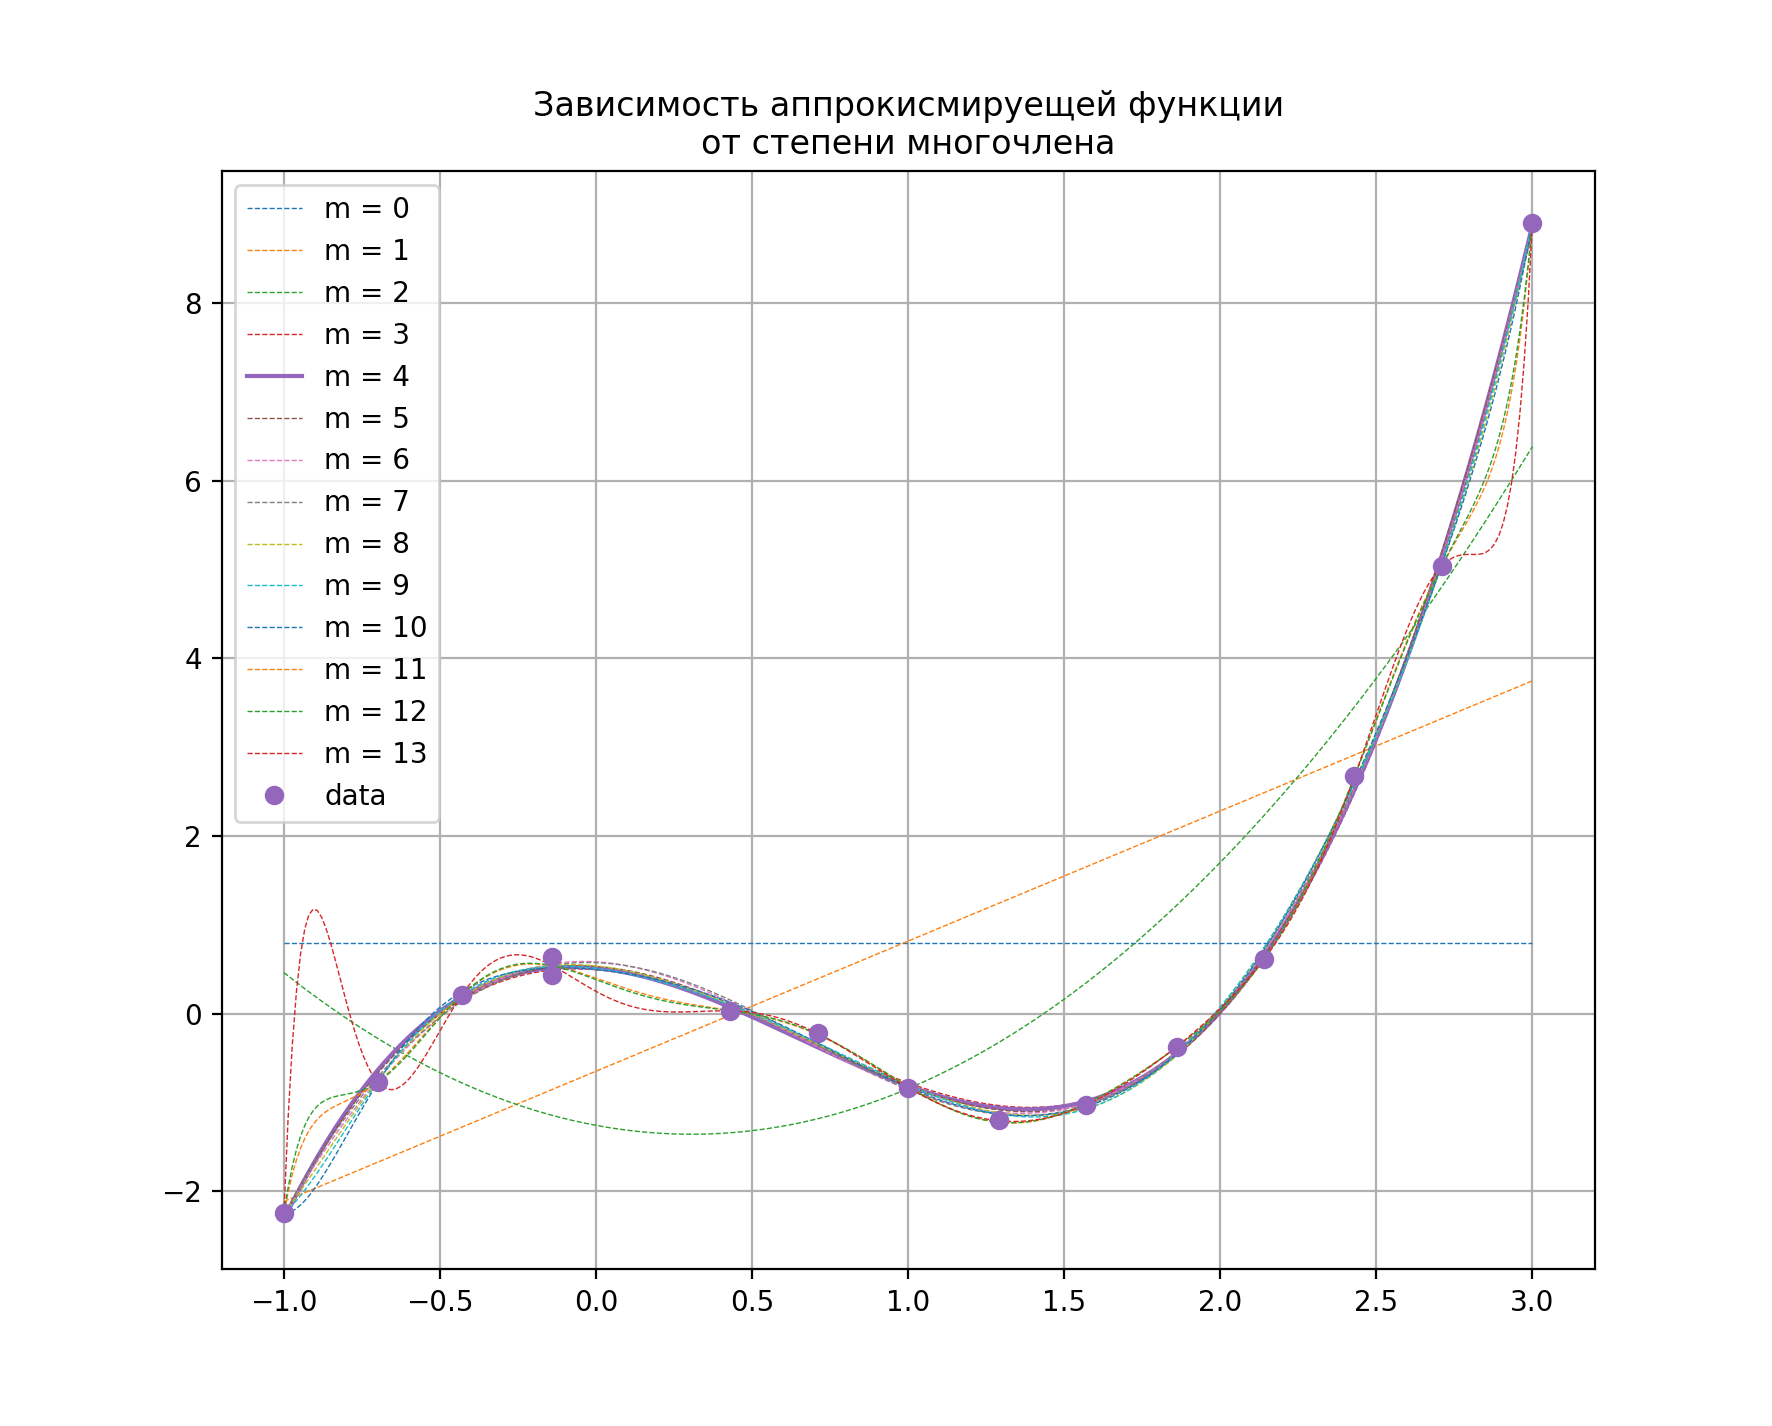

In [5]:
x1 = np.linspace(min(x), max(x), 300)
plt.figure('График 2')
for i in range(14):
    func = approximation(x, y, i)
    if i == m:
        plt.plot(x1, func(x1), '-', lw=1.5, label='m = {}'.format(i))
    else:
        plt.plot(x1, func(x1), '--', lw=0.5, label='m = {}'.format(i))

plt.plot(x, y, 'o', label='data')
plt.legend()
plt.title('Зависимость аппрокисмируещей функции\nот степени многочлена')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


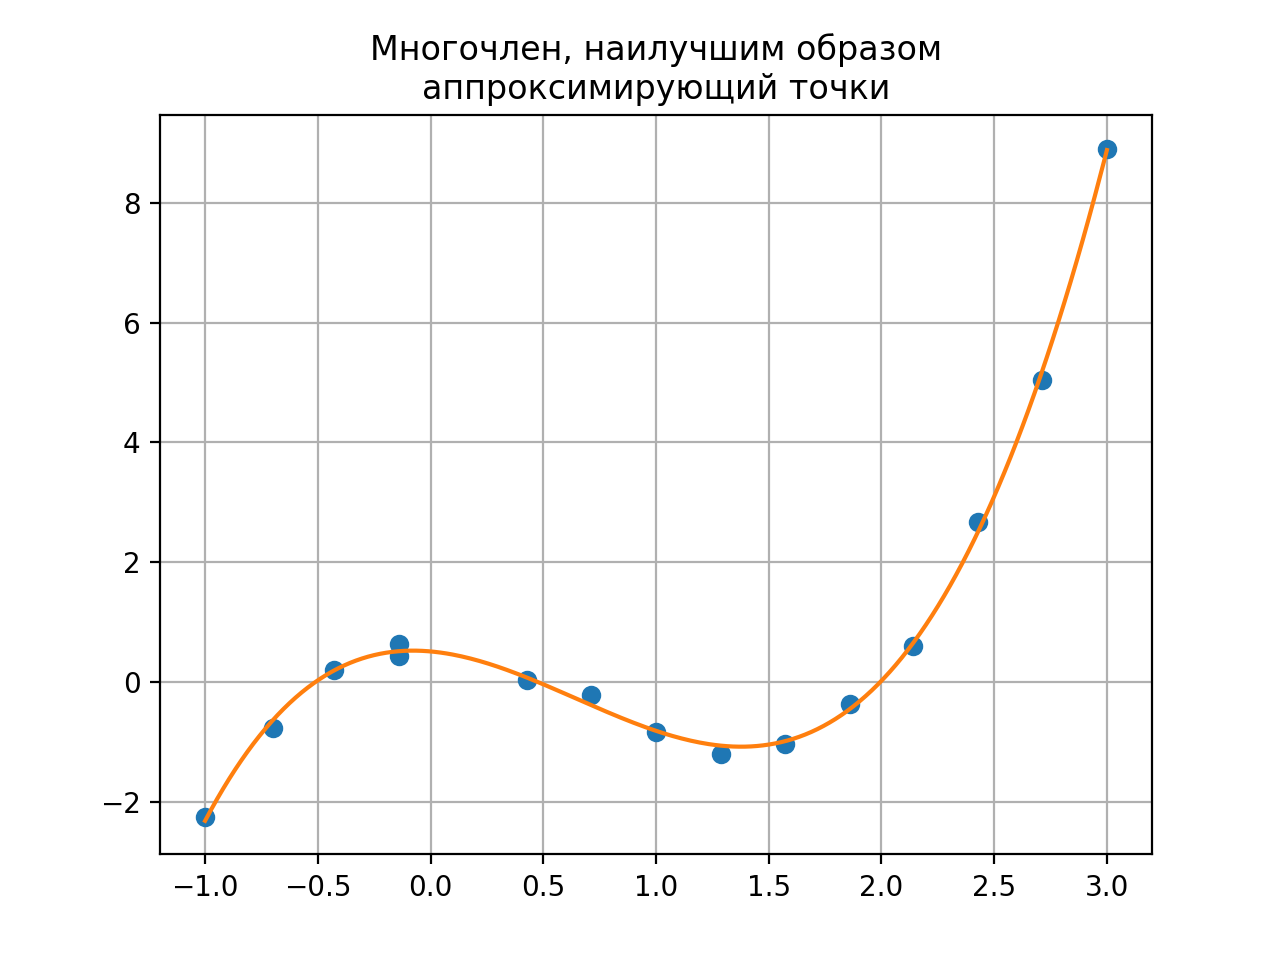

Text(0.5, 1.0, 'Многочлен, наилучшим образом\nаппроксимирующий точки')

In [6]:
f_opt = approximation(x, y, m)
plt.figure('График 3')
plt.plot(x, y, 'o')
plt.plot(x1, f_opt(x1))
plt.grid()
plt.title('Многочлен, наилучшим образом\nаппроксимирующий точки')

Как и предполагалось, многочлен четвертой степени очень хорошо описывает наши точки

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [7]:
x = np.array(x)
y = np.array(y)
A = np.zeros((len(x), m + 1))
for i in range(m + 1):
    A[:, i] = x**i
Q, R = np.linalg.qr(A)
a = np.linalg.solve(R[:m+1, :m+1], (Q.T @ y)[:m+1])
f_qr = lambda x: sum(a[i] * x**i for i in range(m + 1))

<IPython.core.display.Javascript object>


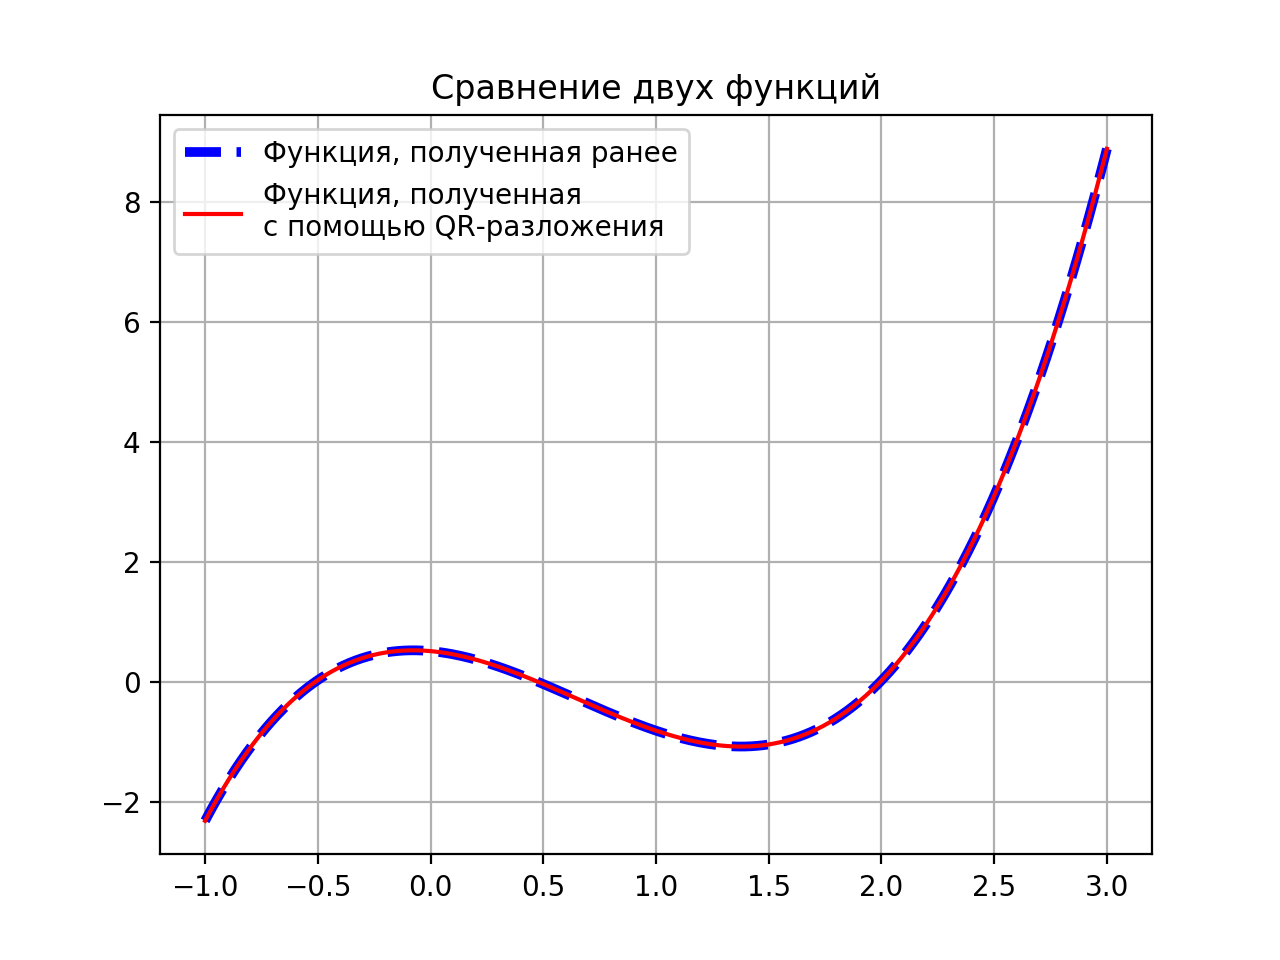

Text(0.5, 1.0, 'Сравнение двух функций')

In [8]:
plt.figure('График 4')
y_opt = f_opt(x1)
y_qr = f_qr(x1)
plt.plot(x1, y_opt, 'b--', lw=3.5, label='Функция, полученная ранее')
plt.plot(x1, y_qr, c='red', label='Функция, полученная\nс помощью QR-разложения')
plt.grid()
plt.legend()
plt.title('Сравнение двух функций')

Из графика видно, что найденные функции ооочень похожи друг на друга. Будем считать, что получившиеся многочлены определены только на отрезке $[-1;3]$, и для лучшего сравнения найдем sup-норму их разности:

In [9]:
print(max(abs(y_opt - y_qr)))

9.547918011776346e-14


Следовательно, наши многочлены практически ничем не отличаются

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

Сначала посмотрим, как выглядит функция на интересующем нас участке

<IPython.core.display.Javascript object>


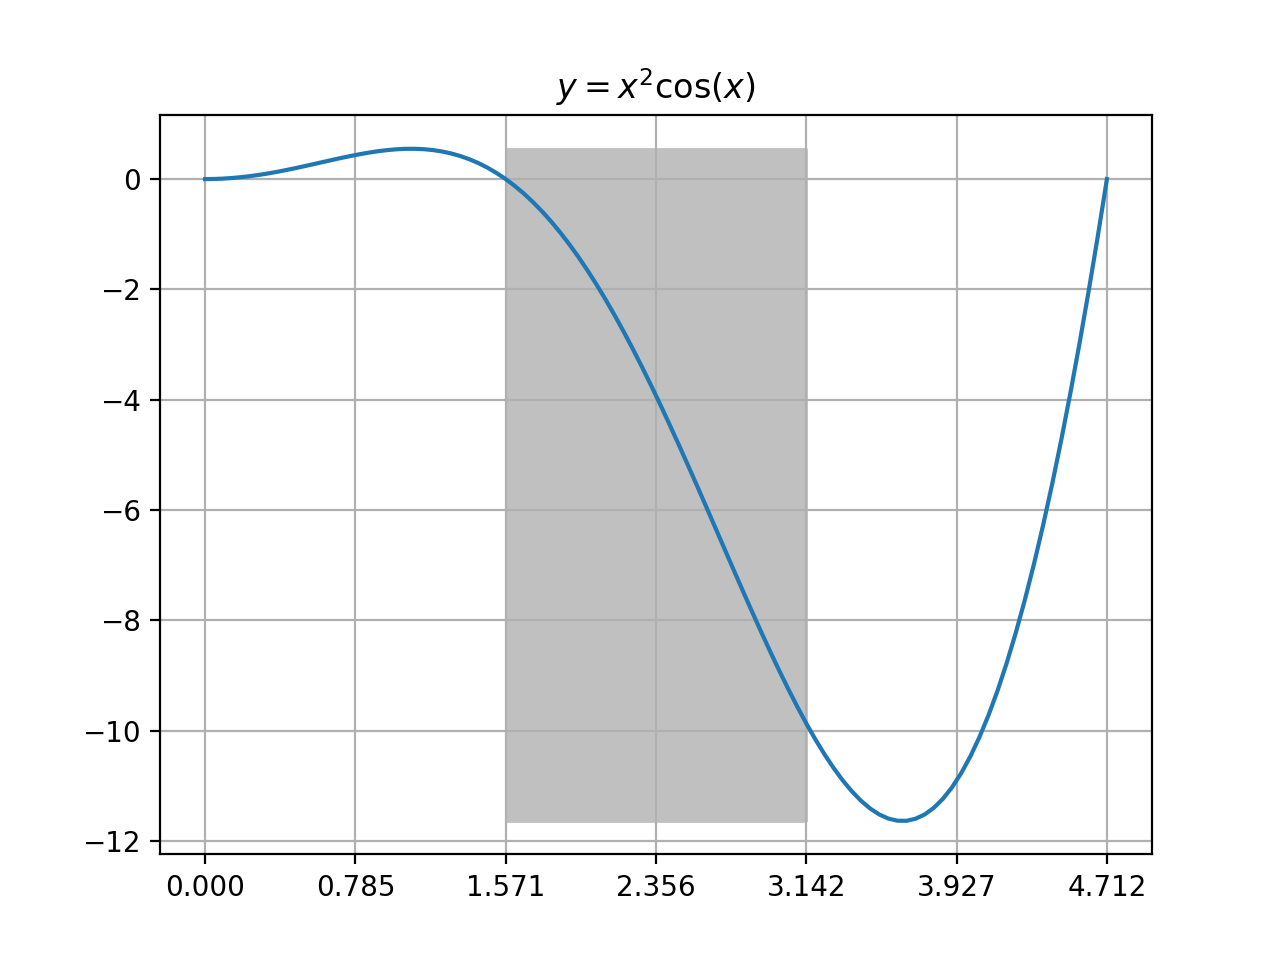

Text(0.5, 1.0, '$y=x^2\\cos(x)$')

In [10]:
f = lambda x: x**2 * np.cos(x)
x2 = np.linspace(0, 1.5 * np.pi, 100)
y2 = f(x2)
plt.figure('График 5')
plt.plot(x2, y2)
plt.fill_betweenx([min(y2), max(y2)], np.pi / 2, np.pi, color='#C0C0C0')
plt.grid()
plt.xticks(np.arange(7) * np.pi / 4)
plt.title('$y=x^2\cos(x)$')

In [11]:
def lagrange_int(x_dots, x_dat, y_dat):
    '''
    Во всех точках x_dots находит значение полинома Лагранжа,
    проведенного через точки (x_dat, y_dat) 
    '''
    x = np.reshape(np.array([x_dots]), -1)
    x0 = np.array(x_dat)
    y0 = np.zeros_like(y_dat)
    n = x.shape[0]
    m = x0.shape[0]
    
    for _ in range(n):
        y0 = np.vstack((y0, y_dat))
    for i in range(m):
        for j in range(m):
            if i != j:
                y0[1:, i] *= (x - x0[j]) / (x0[i] - x0[j])
    return np.sum(y0[1:], axis=1)

<IPython.core.display.Javascript object>


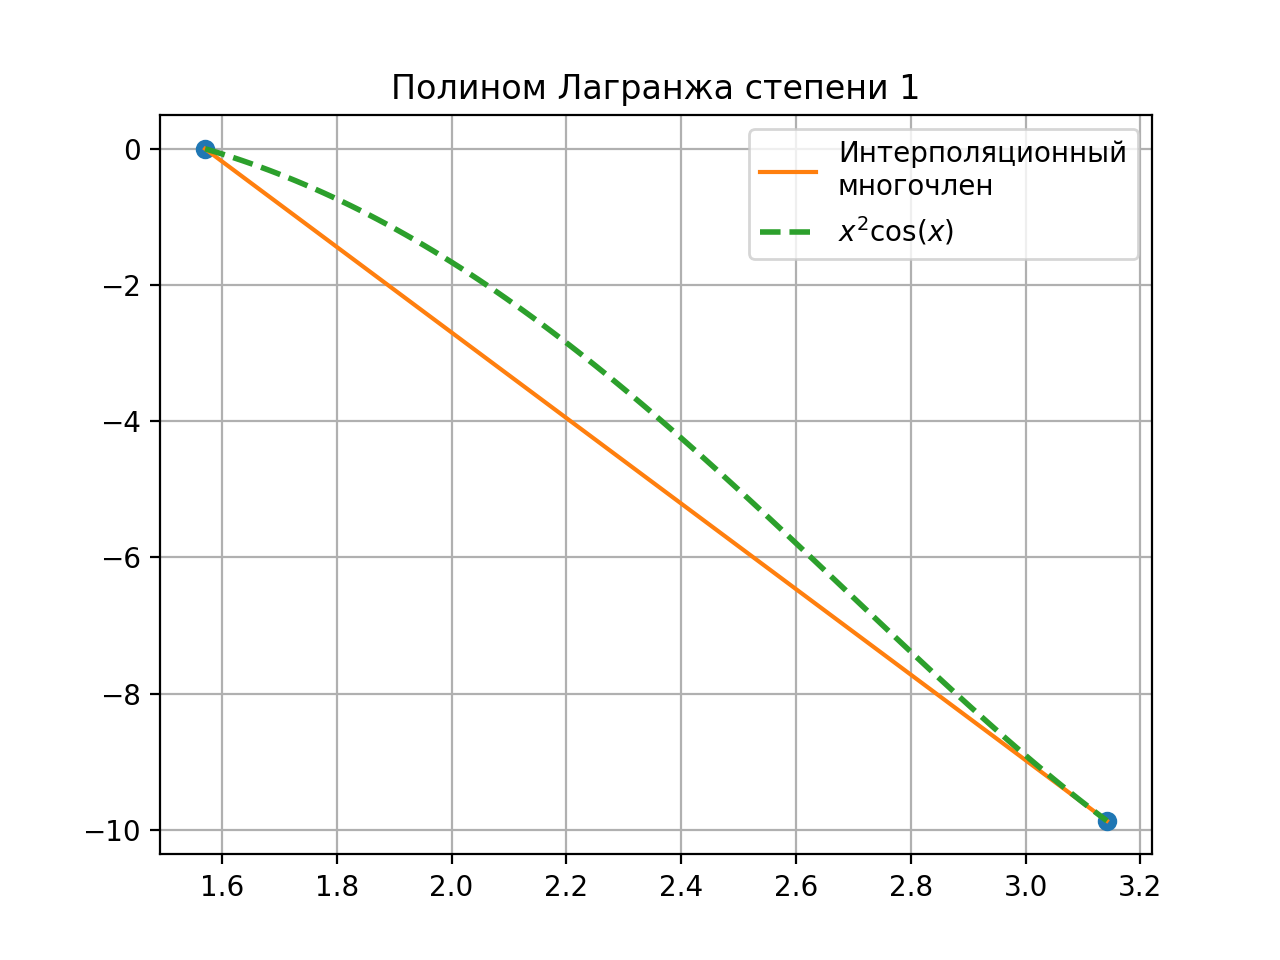

<IPython.core.display.Javascript object>


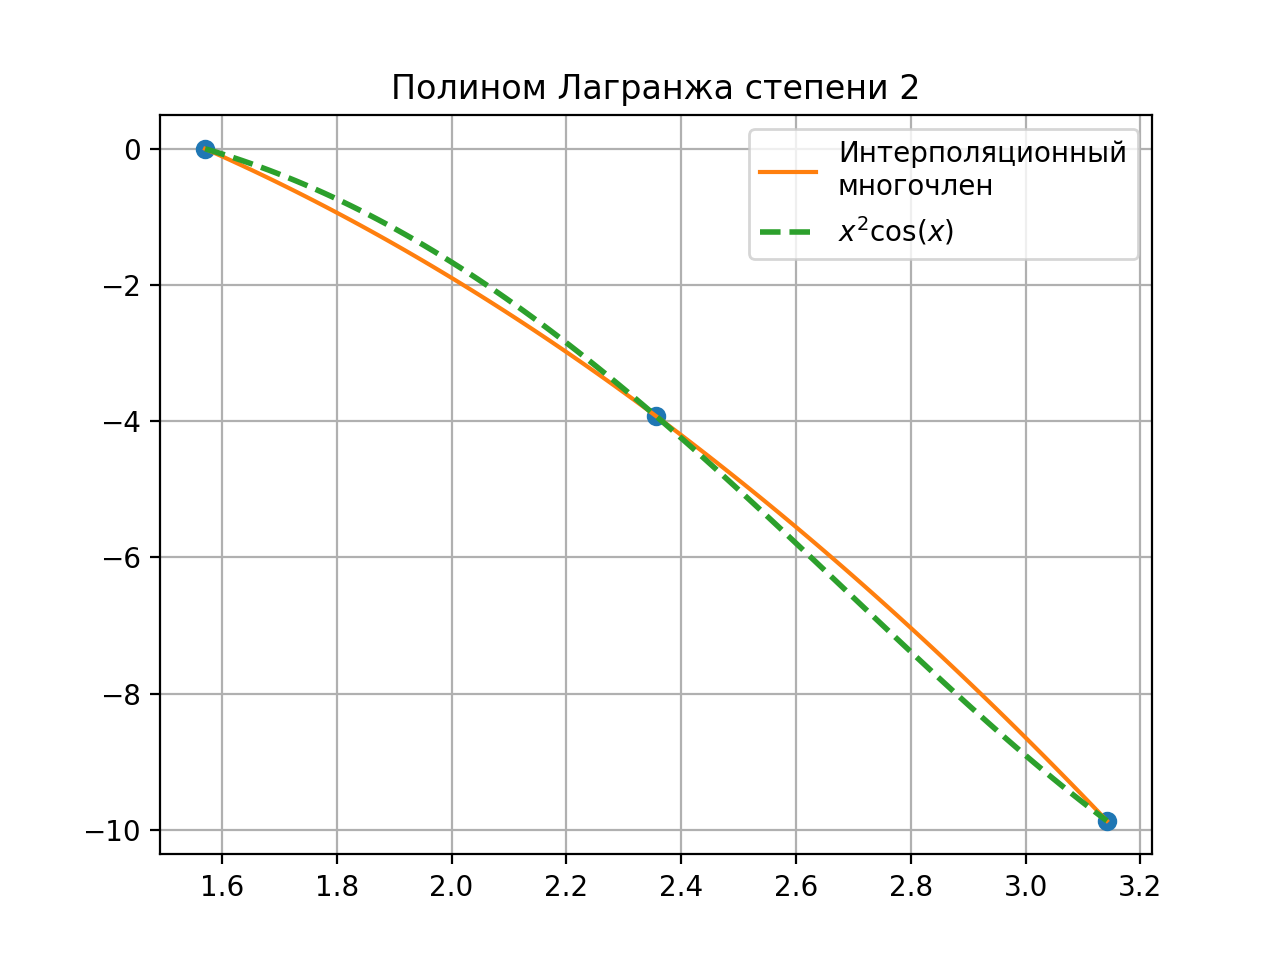

<IPython.core.display.Javascript object>


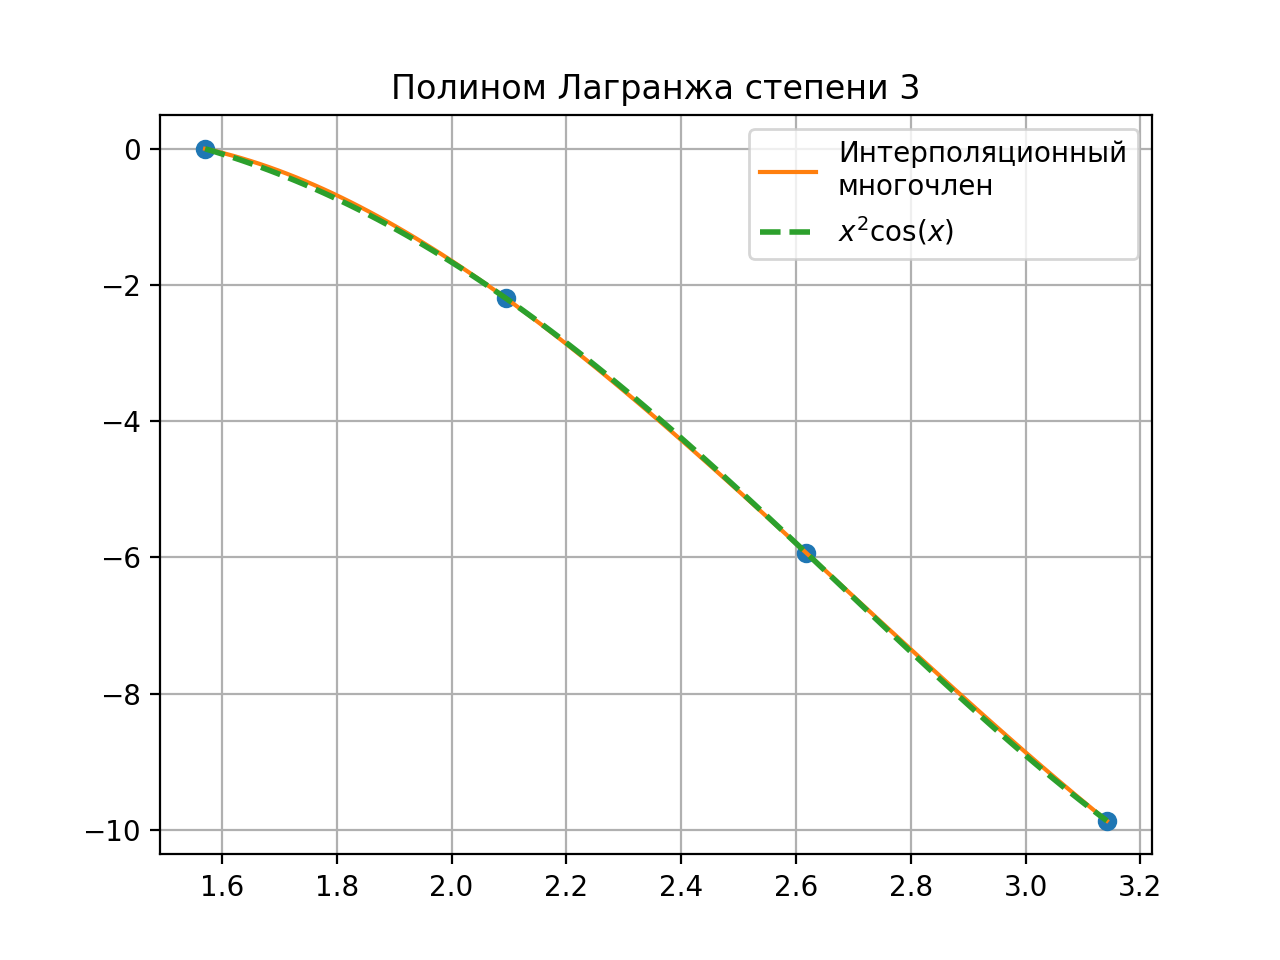

<IPython.core.display.Javascript object>


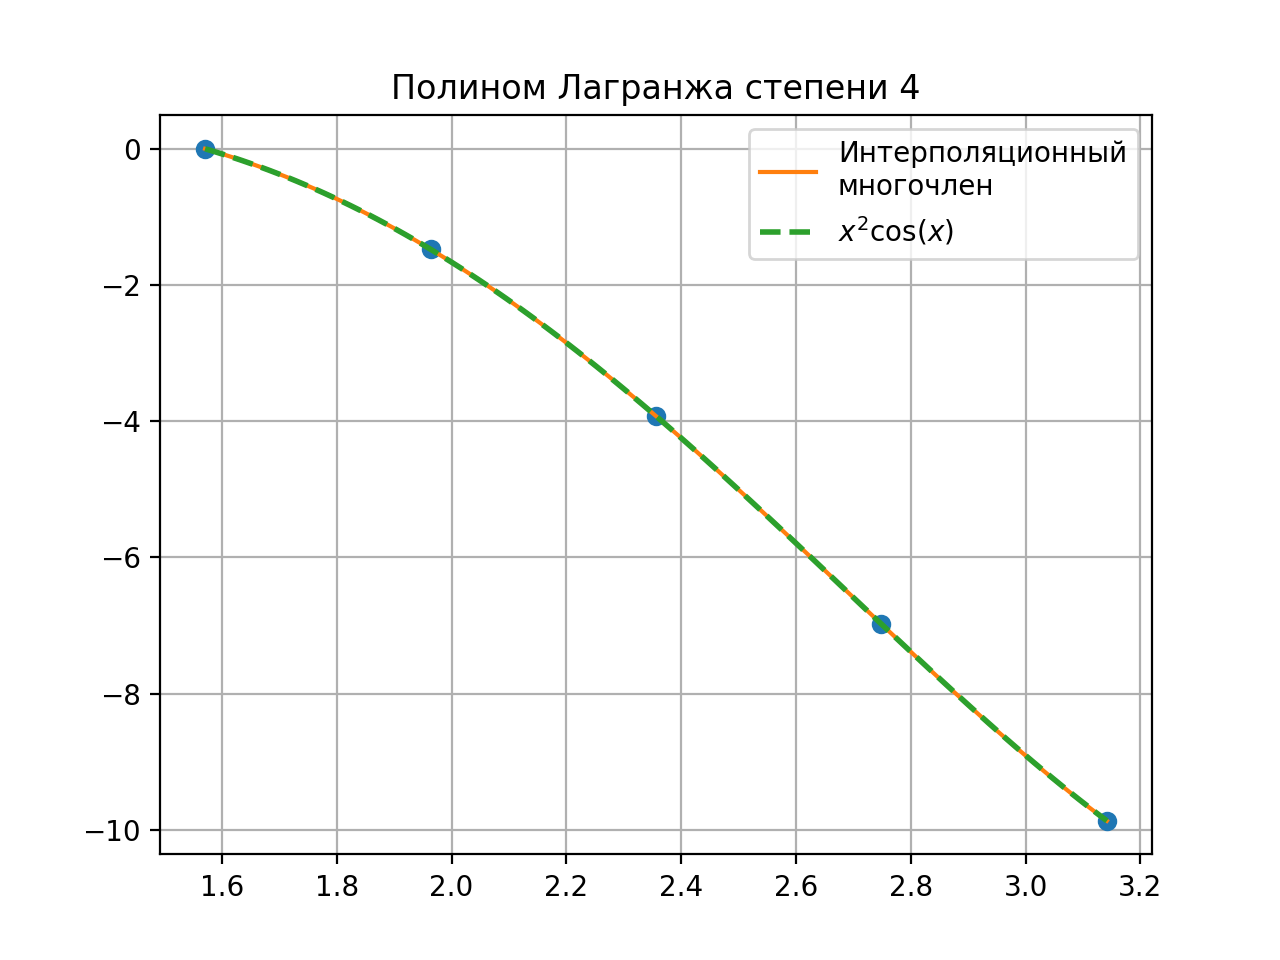

<IPython.core.display.Javascript object>


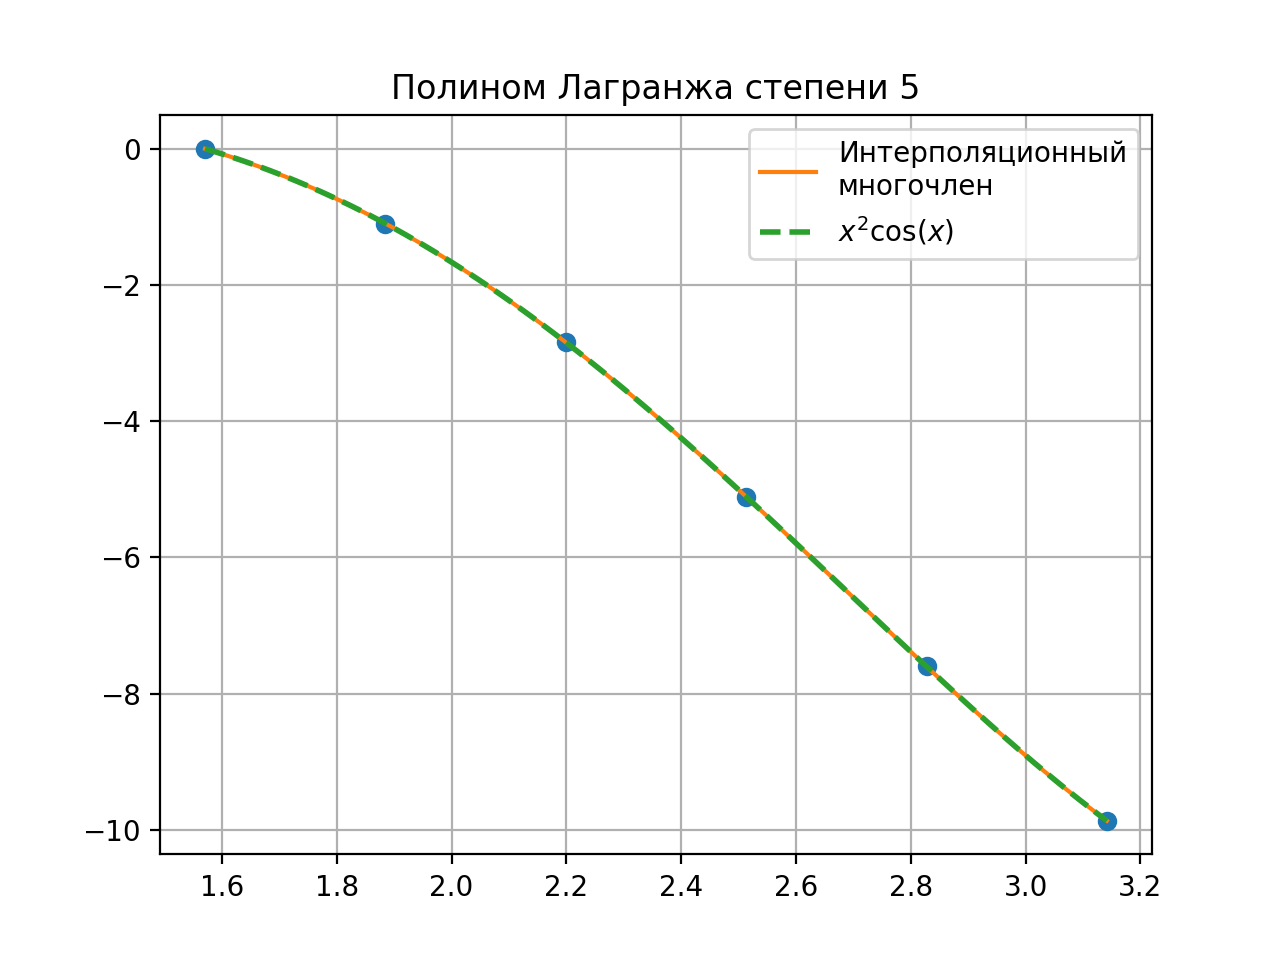

In [12]:
for m in range(1, 6):
    x3 = np.linspace(np.pi / 2, np.pi, m+1)
    y3 = f(x3)
    x4 = np.linspace(np.pi / 2, np.pi, 100)
    y4 = lagrange_int(x4, x3, y3)
    plt.figure('График {}'.format(5 + m))
    plt.plot(x3, y3, 'o')
    plt.plot(x4, y4, label='Интерполяционный\nмногочлен')
    plt.plot(x4, f(x4), '--', lw=2, label='$x^2\cos(x)$')
    plt.legend()
    plt.grid()
    plt.title('Полином Лагранжа степени {}'.format(m))

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

<IPython.core.display.Javascript object>


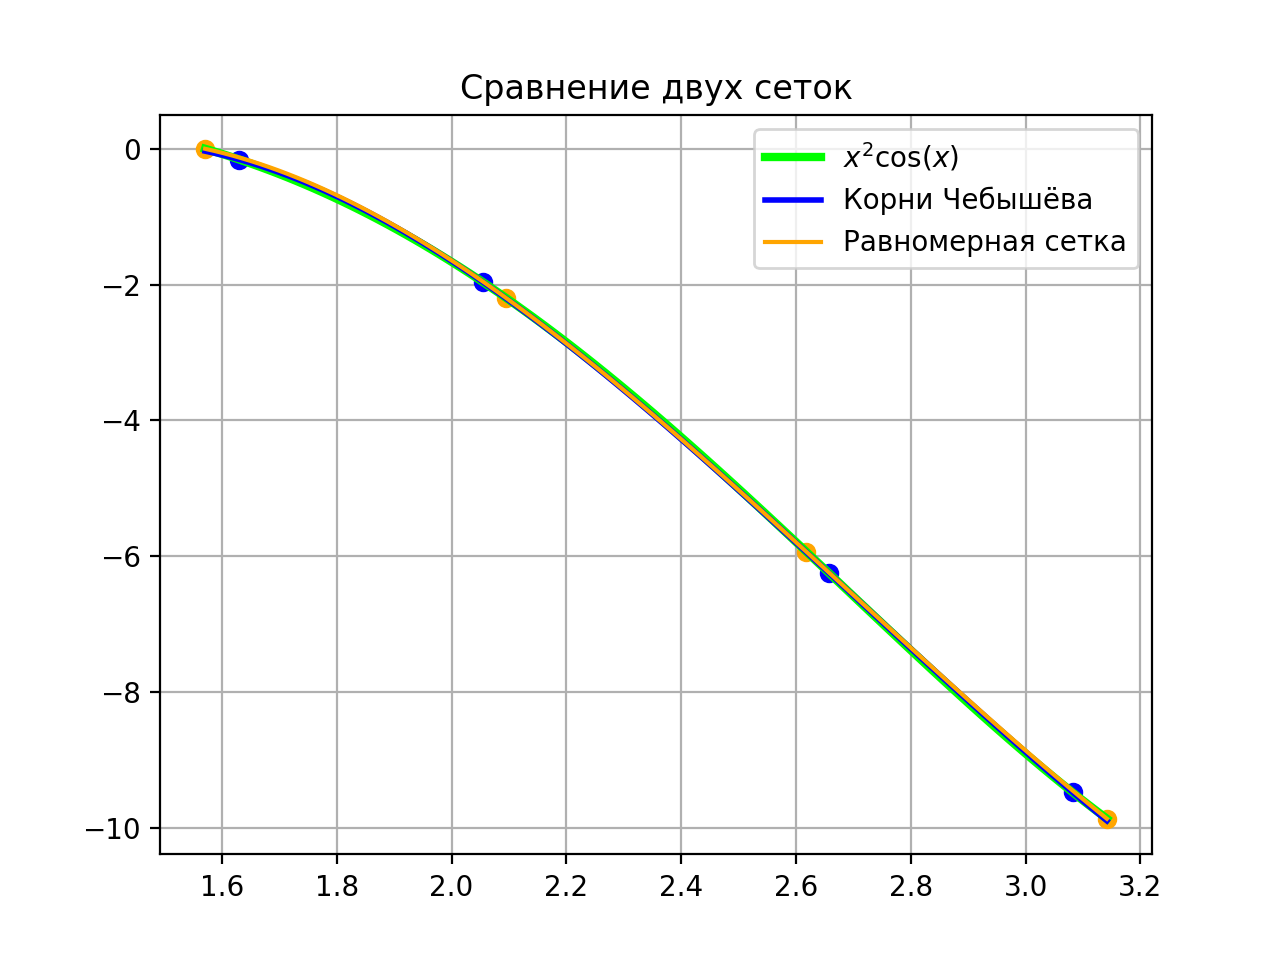

In [13]:
m = 3
x5 = np.linspace(np.pi / 2, np.pi, m + 1)
y5 = f(x5)
k = (2 * np.arange(1, m+2) - 1) * np.pi / (2 * m + 2)
x6 = 0.75 * np.pi + 0.25 * np.pi * np.cos(k)
y6 = f(x6)
x7 = np.linspace(np.pi / 2, np.pi, 100)
plt.figure('График 11')
plt.plot(x6, y6, 'o', color='blue')
plt.plot(x5, y5, 'o', color='orange')
plt.plot(x7, f(x7),
         lw=3,
         color='lime',
         label='$x^2\cos(x)$')
plt.plot(x7, lagrange_int(x7, x6, y6),
         lw=2, 
         color='blue', 
         label='Корни Чебышёва')
plt.plot(x7, lagrange_int(x7, x5, y5),
         color='orange',
         label='Равномерная сетка')
plt.title('Сравнение двух сеток')
plt.legend()
plt.grid()